# Convolutie Kraaijenoff Van der Leur

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import pandas as pd
from importlib import reload

The equations

Kraaijenhof van der Leur (see also Craslaw & Jaeger 1959, pp97, eq.8 or Verruijt (1999, p87)

$$\frac{h-h_{LR}}{h_{0}-h_{LR}}=
2 \sum_{j=1}^{\infty}
\left\{
\frac{\left(-1\right)^{j-1}}{\left((2j-1)\frac{\pi}{2}\right)}
\cos\left[\left(2j-1\right)\frac{\pi}{2}\frac{x}{b}\right]
\exp\left[
-\left((2j-1)\frac{\pi}{2}\right)^{2}
\frac{\tau}{T}\right]
\right\}$$

$$T=\frac{b^2S}{kD}$$

We prefer summing from zero instead of 1. So by replacing $j$ by $k+1$ we get

$$\frac{h-h_{LR}}{h_{0}-h_{LR}}=
2 \sum_{k=0}^{\infty}
\left\{
\frac{(-1)^k}{(k+\frac{1}{2})\pi}
\cos\left[\left(k+\frac{1}{2}\right)\pi\frac{x}{b}\right]
\exp\left[
-\left((k+\frac{1}{2})\pi\right)^{2}
\frac{\tau}{T}\right]
\right\}$$

The average head $\overline{h}$ in the cross section is obtained by integrating the head along $x$ over $0 \le x \le b$ and dividing by $b$:

$$\frac{\overline{h}-h_{LR}}{h_{0}-h_{LR}}=
2 \sum_{k=0}^{\infty}
\left\{
\frac{(-1)^k}{\left((k+\frac{1}{2})\pi\right)^{2}}
\sin\left[\left(k+\frac{1}{2}\right)\pi\right]
\exp\left[
-\left((k+\frac{1}{2})\pi\right)^{2}
\frac{\tau}{T}\right]
\right\}$$

**Halftime** follows from the exponent in the first term $k=0$. We will use it by way of verigication by chosing times at multiples of this half time.

$$ \exp \left( - \left(\frac{\pi}{2}\right)^2\frac{t + \Delta t_{0.5}}{T}\right)
=0.5
\exp \left( - \left(\frac{\pi}{2}\right)^2\frac{t}{T}\right)
$$

$$ \left(\frac{\pi}{2}\right)^2\frac{t + \Delta t_{0.5}}{T}
= -\ln(0.5) + 
\left(\frac{\pi}{2}\right)^2\frac{t}{T}
$$

$$ \left(\frac{\pi}{2}\right)^2\frac{\Delta t_{0.5}}{T}
= \ln(2)
$$

$$ \Delta t_{0.5}
= \left(\frac{2}{\pi}\right)^{2}\ln(2) \,\, T
\approx 0.28 \, T
$$

## Implementations

In [2]:
def KvdL1(A, kD, S, b, times, **kwargs):
    '''Plot Kraaijenhof vd Leur, summing from 1 to infinity
    parameters
    ----------
        A: h0 - hLr = initial head at x = 0 relatieve to ditch water level
        kD, S, b: transmissivity, storage coefficient and half width of the cross section
        times: list or array of times to show the results
        **kwargs: ax and the rest is passed on to plt.plot(....**kwargs)
    '''
    colors = 'b r g k m c y'.split()* int(np.ceil(len(times) / 7))
    T = b ** 2 * S / kD
    x = np.linspace(-b, b, 51)
    name = "KvdL1"
    ax = kwargs.pop('ax', plt.gca())
    for t, clr in zip(times, colors):
        s = np.zeros_like(x)
        for j in range(1, 20): # starts at 1
            j2m1 = np.pi /2 * (2 * j - 1)
            s += A * (-1)**(j-1) / j2m1 * np.cos(j2m1 * x / b) * np.exp(- j2m1 ** 2 * t/T)
        ax.plot(x, s, label="{} t = {:.2f} d".format(name, t), color=clr, **kwargs)
    return

In [3]:
def KvdL2(A, kD, S, b, times, **kwargs):
    '''Plot Kraaijenhof vd Leur, summing from 0 to infinity
    parameters
    ----------
        A: h0 - hLr = initial head at x = 0 relatieve to ditch water level
        kD, S, b: transmissivity, storage coefficient and half width of the cross section
        times: list or array of times to show the results
        **kwargs: ax and the rest is passed on to plt.plot(....**kwargs)
    '''

    colors = 'b r g k m c y'.split()* int(np.ceil(len(times) / 7))
    T = b ** 2 * S / kD
    x = np.linspace(-b, b, 51)
    name = "KvdL2"
    ax = kwargs.pop('ax', plt.gca())
    for t, clr in zip(times, colors):
        s = np.zeros_like(x) # starts at zero
        for k in range(21):
            kp05 = np.pi * (k + 0.5)
            s += A * (-1)**(k) / kp05 * np.cos(kp05 * x / b) * np.exp(- kp05 ** 2 * t/T)
        ax.plot(x, s, label="{} t = {:.2f} d".format(name, t), color=clr, **kwargs)
    return

In [4]:
def KvdL2_mean(A, kD, S, b, times, **kwargs):
    '''Plot Kraaijenhof vd Leur, average head in cross section (summing from 1 to infinity)
    parameters
    ----------
        A: h0 - hLr = initial head at x = 0 relatieve to ditch water level
        kD, S, b: transmissivity, storage coefficient and half width of the cross section
        times: list or array of times to show the results
        **kwargs: ax and the rest is passed on to plt.plot(....**kwargs)
    '''

    colors = 'b r g k m c y'.split()* int(np.ceil(len(times) / 7))
    T = b ** 2 * S / kD
    name = 'KvdL2_mean'
    ax = kwargs.pop('a', plt.gca())
    for t, clr in zip(times, colors):
        s = 0
        for k in range(21):
            kp05 = np.pi * (k + 0.5)
            s += A * (-1)**(k) / kp05**2 * np.sin(kp05) * np.exp(- kp05 ** 2 * t/T)
        ax.plot([-b, b], [s, s], label="{} t = {:.2f} d".format(name, t), color=clr, **kwargs)

## Example

The three implementations are used for mutual verification. The times shown are multiples of the halftime, except the first, which is mucht shorter to show the situation shortly after $t=0$ when the is still largely equal to the initial situation.

In [5]:
A, kD, S, b = 2, 600, 0.2, 100
T = b**2 * S / kD

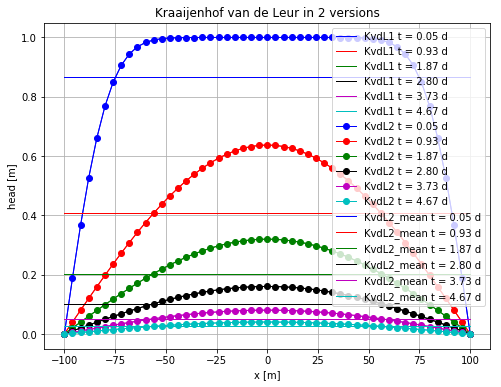

In [6]:
t05 = 0.28 * T
times = np.hstack((0.05, np.arange(1, 6))) * t05

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.set_title("Kraaijenhof van de Leur in 2 versions")
ax.set_xlabel('x [m]')
ax.set_ylabel('head [m]')
ax.grid()

KvdL1(A, kD, S, b, times, ls='-', lw=1)
KvdL2(A, kD, S, b, times, marker='o', lw=1)
KvdL2_mean(A, kD, S, b, times,ls='-', lw=1)

ax.legend()

plt.show()

# Simulation by convolution

Here too we have different options.

1) Use the `KrvdL2` solution as an impulse response to compute the dynamic position for any point $x$ in the cross section.
1) Use the solution for the average head in the cross section

When done, we may compare the results with those of straigt-forward superposition.

## Impulse response

Conversion to the effect of a recharge impulse $N dt$ is done by replacing

$$h_{0}-h_{LR}=\frac{P}{\mu}=\frac{Ndt}{\mu}$$

It is the head due to a sudden shower that immediately and completely arrives at the water table. The solution will then show the decay thereafter when the head strives toward its equilibrium level, which equals that of the drainage level, i.e. 0.

The soltion for $Ndt$ is unity, is then the impulse response $R_{x, t}$. The head at any time and x-value in the cross  section can then be computed by convolution:

$$h-h_{LR}=\intop_{\tau=0}^{\infty}N_{t-\tau}R_{x,\tau}d\tau$$

Herein is $N_{t-\tau} d\tau$ the impulse in the past at time $\tau$ before the considred time $t$ and $R_{x,\tau}$ is the impulse response. It is the effect of a unit pulse a time $\tau$ after the event.

Impulse response $R_{x, t}$ becomes:

$$R_{x,\tau}=\frac{2}{\mu}
\sum_{k=0}^{\infty}
\left\{
\frac{(-1)^{k}}{\left(k+\frac{1}{2}\right)\pi}
\cos\left[\left(\left(k+\frac{1}{2}\right)\pi\right)\frac{x}{b}\right]
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^{2}\frac{\tau}{T}\right]
\right\} $$

To get the impulse response for the average head inthe cross section, integration across cross section is done:

$$R_{\tau}=\frac{1}{b}\intop_{0}^{b}R_{x,\tau}dx$$

Formulating the integration:

$$R_{x,\tau}=\frac{2}{\mu}
\sum_{k=0}^{\infty}
\left\{
\frac{(-1)^{k}}{\left(k+\frac{1}{2}\right)\pi}
\frac{1}{b}\intop_0^b\cos\left[\left(\left(k+\frac{1}{2}\right)\pi\right)\frac{x}{b}\right]dx \times
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^{2}\frac{\tau}{T}\right]
\right\} $$

Carrying out the integration:

$$R_{\tau}=\frac{2}{\mu}
\sum_{k=0}^{\infty}
\left\{
\frac{(-1)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{2}}
\sin\left(\left(k+\frac{1}{2}\right)\pi\right)
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^{2}\frac{\tau}{T}\right]
\right\} $$

The convolution is done using the `lfilter` function from module `scipy.signal` (same as Matlab's `filter`)

## Implemention of the impulse resonses

In [7]:
def Rxtau(kD, S, b, x, taus, n=20):
    '''Return impuls response for Kraaijenoff vd Leur
    
    because the pulse is at zero time from taus[0] we add 0.5 * dtau to taus to get a more realistic
    result. This is by putting the pulse at the center of the time step.
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        taus: pandas dataframe index with the times as timestamps
        n: number of terms to compute
    '''
    r = np.zeros_like(taus)
    T = b**2 * S / kD
    dtau = np.diff(taus).mean()
    for k in range(0, n):
        kp05 = np.pi * (k + 0.5)
        r += (-1) ** k / kp05 * np.cos(kp05 * x/b) * np.exp(-kp05 ** 2 * (taus + 0.5 * dtau) / T)
    return 2 * r / S

In [8]:
def Rtau(kD, S, b, taus, n=20):
    '''Return impuls response for Kraaijenoff vd Leur
    
    because the pulse is at zero time from taus[0] we add 0.5 * dtau to taus to get a more realistic
    result. This is by putting the pulse at the center of the time step.
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        taus: pandas dataframe index with the times as timestamps
        n: number of terms to compute
    '''
    r = np.zeros_like(taus)
    T = b**2 * S / kD
    dtau = np.diff(taus).mean()
    for k in range(0, n):
        kp05 = np.pi*(k + 0.5)
        r += (-1) ** k / kp05 ** 2 * np.sin(kp05) * np.exp(- kp05 ** 2 * (taus + 0.5 * dtau)/ T) 
    return 2 * r / S

To compare the two impulse responses, we can compare the results for `Rxtau` for the x-value where the head in the cross section equals the average head. For this we first see what the average value of the cosine is between for its arguments between 0 and $\pi/2$ and then look at what position in the cross section this is the case. The results should match when the all higher cosine terms vanish. This is already the case for $t > 0.23 t_{50\%}$, when the seond term becomes less than 1% of the first term.

The average value of the sine or the cosine between 0 and $\frac{\pi}{2}$ is $\frac{2}{\pi}$. The x-value for which this is the case can be obtained from
$$ \frac 1 b \intop_0^b \cos \left(\frac \pi 2 \frac x b \right) dx =
\intop_0^1 \cos \left(\frac \pi 2 \beta \right) d\beta
= \frac 2 \pi \sin \left(\frac \pi 2 \beta \right)_{\beta=0}^{\beta=1} = \frac 2 \pi$$

The angle where the `cos` equals is $ \frac{2}{\pi}$ is $\mathtt{arccos}(\frac 2 \pi) \approx 0.88$ radians. To convert this to a fraction of the width $b$ we have to divide this angle by $\frac \pi 2$, which yields 0.56. Therefore, when we use $x = 0.56\, b$, both the average head and the head at $x = 0.56\, b$ should be about the same. More or less because for times short relative to the characteristic time, the shape of the head in the cross section is not a cosine.

We will compute and show both response as a function of $\tau$.

The black line in the plot below is the average for the cross section. The black dots are the values for $x = 0.56 b$; the black line and the black dots should match for $t > 0.23 \, t_{50\%}$. When $t > 0.23 t_{50\%}$, the second terms is less than 1% of the first term, so that then all higher terms in the series can be neglected. A can be concluded from the graphs the black line and dots match this criterion ($t_{50\%}$ is about 1 day in this example case). 

## Example

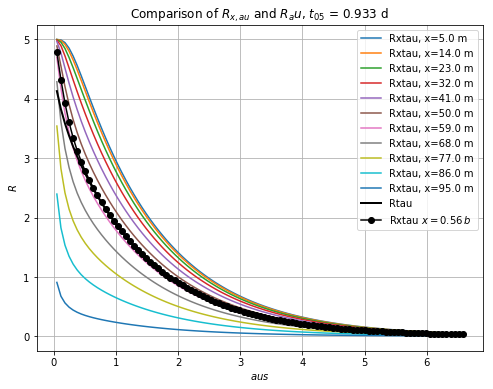

In [9]:
kD, S, b = 600, 0.2, 100
X = np.linspace(0.05, 0.95, 11) * b
T = b**2 * S / kD
t05 = 0.28 * T
dt = 1.0 # d
n = 50
taus = t05 * (0.05 + np.linspace(0, 7, 101))

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.set_title("Comparison of $R_{x,\tau}$ and $R_\tau$, $t_{05}$ = " + "{:.3f} d".format(t05))
ax.set_xlabel('$\taus$')
ax.set_ylabel('$R$')
ax.grid()
for x in X:
    ax.plot(taus, Rxtau(kD, S, b, x, taus, n=n), label='Rxtau, x={:.1f} m'.format(x))
ax.plot(taus, Rtau( kD, S, b, taus, n=n), label='Rtau', lw=2, color='k')
ax.plot(taus, Rxtau(kD, S, b, 0.56*b, taus, n=n), label='Rxtau $x=0.56\,b$', marker='o', color='k')
ax.legend()
plt.show()

When we compute the convolution in steps of 1 day, the results will not be very accurate of the decay is fast, because the moment the pulse is placed to represent the whole day then has substantial inpact on the outcome. A practical approach would be to place the pulse half-way during the day, 12:00h, noon, so to say. This would be satifactory. It means that we take $\tau=[0.5, 1.5, 2.5 ...]$ days.

A more accurate appoach would be to compute the response of continuous recharge during a whole day, as we assume that the rechage values that we have are averages for the days they pertain to, which, of course, still deviates from reality. Both approaches are believed to yiel about the same results and it is hard to say which one is better.

Another point to consider is that the recharge will often times not immediately reach the water table. Especially in sites with a deep water table it make take a few days per m depth of the water table. In that case one should take the delay by the vadose zone into account. This can be done to filter the recharge input as to generate a time series of the arrival of the recharge at the water table. This filtering dampens the input, so that the moment when to place the pulse matters even less.

# Step response for constant recharge

The step response for constant recharge is given by Bruggeman (1999, p.101) which considers the effect on the cross section caused by a constant recharge from $t=0$ and an initial head $h=0$.

$$
h_{x,t} -h_{LR} = \frac{N}{b^2-x^2}-\frac{2Nb^2}{kD} \sum_{k=0}^\infty
\frac{\left(-1\right)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{3}}
\cos\left[
\left(k+\frac{1}{2}\right)\pi
\frac{x}{b}
\right]
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^2\frac{t}{T}\right]
$$
with
$$T = \frac {b^2S}{kD}$$ note that $\frac{b^2}{kD} = \frac{b^2S}{kDS}=\frac{T}{S}$ so that the factor in front of the $\sum$ can be replaced by $ 2 N \frac {T}{S}$.

In [10]:
def brug133_16(kD, S, b, N, times, n=20, **kwargs):
    x = np.linspace(-b, b, 51)
    T = b ** 2 * S / kD
    ax = kwargs.pop('ax', plt.gca())
    for t in times:
        s = N / (2 * kD) * (b **2 - x ** 2)
        for k in range(n):
            kp05 = (k + 0.5) * np.pi
            s -= 2 * N * T / S * (-1) ** k / kp05 ** 3 * np.cos(kp05 * x/b) * np.exp(-kp05 ** 2 * t/T)
        ax.plot(x, s, label="t = {:.3f} d".format(t), **kwargs)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('head')
    ax.grid()
    ax.legend()
    return

def brug133_16a(kD, S, b, N, x, times, n=20, **kwargs):
    T = b ** 2 * S / kD
    ax = kwargs.pop('ax', plt.gca())
    s = N / (2 * kD) * (b **2 - x ** 2) * np.ones_like(times)
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s -= 2 * N * T / S * (-1) ** k / kp05 ** 3 * np.cos(kp05 * x/b) * np.exp(-kp05 ** 2 * times/T)
    ax.plot(times, s, label="x = {:.1f} m".format(x), **kwargs)
    ax.set_xlabel('time')
    ax.set_ylabel('head')
    ax.grid()
    ax.legend()
    return


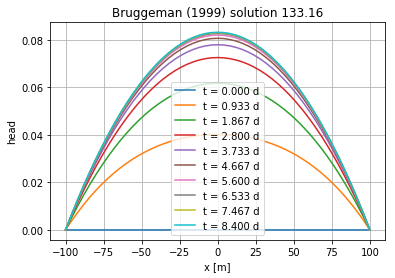

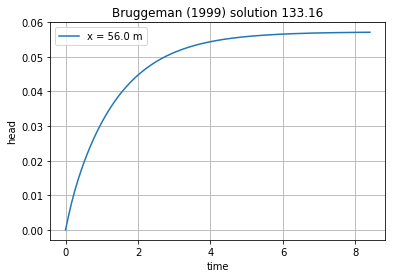

In [11]:
t50 = 0.28 * b**2 * S / kD;
times = np.arange(0, 10) * t50
fig1, ax1 = plt.subplots()
kwargs ={'ax':ax1}
ax1.set_title('Bruggeman (1999) solution 133.16')
brug133_16(kD, S, b, N=0.01, times=times, n=20, **kwargs)

time = np.linspace(0, times[-1], 200)
fig2, ax2 = plt.subplots()
ax2.set_title('Bruggeman (1999) solution 133.16')
kwargs ={'ax':ax2}
brug133_16a(kD, S, b, N=0.01, x=0.56*b, times=time, n=20, **kwargs)

The step response, i.d. the response of a continue recharge equal to unity then is

$$
Rs_{x,\tau} = \frac{1}{b^2-x^2}-\frac{2T}{S} \sum_{k=0}^\infty
\frac{\left(-1\right)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{3}}
\cos\left[
\left(k+\frac{1}{2}\right)\pi
\frac{x}{b}
\right]
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^2\frac{\tau}{T}\right]
$$

The step response, for the averate head in the cross section is then obtained by integration of the cos between 0 and $b$ and deviding by $b$

$$
\frac{1}{b}\intop_0^b\cos\left(\left(k+\frac{1}{2}\right)\pi\frac{x}{b}\right)dx=
\frac{\sin\left(\left(k+\frac{1}{2}\right)\pi\right)}{\left(k+\frac{1}{2}\right)\pi}
$$

and for the first term
$$
\frac{1}{2 kD \,b}\intop_0^b\left(b^2 - x^2\right)dx=\frac{1}{2 kD \, b}\left(
b^2x - \frac{x^3}{3}\right)_0^b=\frac{b^2}{3 kD} = \frac{T}{3S}
$$
At what position is the steady state head the same as the average head in the cross section?

$$
\frac{b^2-x^2}{2 kD} = \frac{b^2}{3 kD} \rightarrow \frac{x^2}{2}=\frac{b^2}{6}\rightarrow x=\frac{b}{\sqrt{3}}\approx 0.58 b
$$

Therefore, the step response for the average head in the cross section follows then becomes

$$
Rs_{\tau} = \frac{T}{3S}-\frac{2T}{S} \sum_{k=0}^\infty
\frac{\left(-1\right)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{4}}
\sin\left[
\left(k+\frac{1}{2}\right)\pi
\right]
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^2\frac{\tau}{T}\right]
$$

The block response, i.e. when the unit input is active during only one timestep is easily obtained from the stepresponse

$$
Bs_\tau = Rs_\tau - Rs_{\tau-d\tau}
$$

In [12]:
def Rs_tx(kD, S, b, x, taus=None, n=20):
    '''Return step response at point x'''
    T = b ** 2 * S / kD
    s = 1 / (2 * kD) * (b **2 - x ** 2)
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s -= 2 * T / S * (-1) ** k / kp05 ** 3 * np.cos(kp05 * x/b) * np.exp(-kp05 ** 2 * taus/T)
    return s

In [13]:
def Rs(kD, S, b,taus=None, n=20):
    '''Return step response for average head in cross section'''
    T = b ** 2 * S / kD
    s = T / (3 * S) + np.zeros(len(taus))
    taus = np.asarray(taus, dtype=float)
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s -= 2 * T / S * (-1) ** k / kp05 ** 4 * np.sin(kp05) * np.exp(-kp05 ** 2 * taus/T)
    return s

def Bs(kD, S, b, taus, n=20):    
    s = Rs(kD, S, b, taus, n=n)
    s[1:] -= s[:-1]
    return s

In [14]:
kD, S, b = 600., 0.2, 400.
T = b ** 2 * S / kD
t50 = 0.28 * T
#print(T)

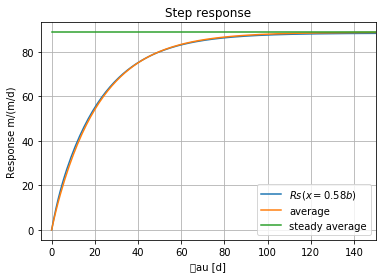

In [15]:
fig, ax = plt.subplots()
ax.set_title('Step response')
ax.set_xlabel('\tau [d]')
ax.set_ylabel('Response m/(m/d)')
ax.set_xlim((-5, 150))
ax.grid()
x = 0.58 * b # choose the point that both step responses should be equal
taus = np.linspace(0, 2000, 2001)

ax.plot(taus, Rs_tx(kD, S, b, x, taus=taus), label='$Rs(x=0.58b)$')
ax.plot(taus, Rs(kD, S, b, taus=taus), label='average')
ax.plot(taus[[0,-1]], 1/3 * b ** 2 / kD * np.ones(2), label='steady average')
ax.legend()
plt.show()

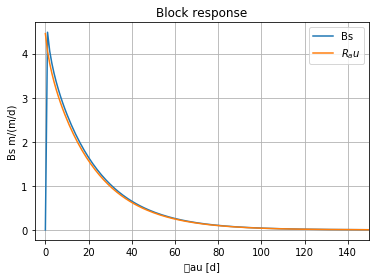

In [16]:
fig, ax = plt.subplots()
ax.set_title('Block response')
ax.set_xlabel('\tau [d]')
ax.set_ylabel('Bs m/(m/d)')
ax.set_xlim((-5, 150))
ax.grid()

ax.plot(taus, Bs(kD, S, b, taus), label='Bs')
ax.plot(taus, Rtau(kD, S, b, taus, n=20), label='$R_\tau$')
ax.legend()
plt.show()

The above proves that the two methods are equivalent. The impulse response, in fact the Kraaijenhoff vd Leur solution equals the block response derived from Bruggeman's solution for the step response of a unit perpetual recharge starting at $t=0$.

# Convolution

The idea is to show that the solution by superposition is the same as that by convolution.


Getting some functionality from the module ggor_analytical

In [17]:
GGOR = '/Users/Theo/GRWMODELS/python/GGOR/analytic'
import sys

if GGOR not in sys.path:
    sys.path.insert(0, GGOR)

import ggor_analytical as gg

In [18]:
reload(gg)

<module 'ggor_analytical' from '/Users/Theo/GRWMODELS/python/GGOR/analytic/ggor_analytical.py'>

Fetching meteo data from `gg` and from the index of the meteo dataframe, interpolate the recharge values from the meteo files using the times at equal distance `dt` of 1 day. We use them also as `taus`. Recompute times that now match the constant time interval. The advantage of this method is that it always works for any fixed timeinterval and has no problem with possible dates that may be missing in the meteo data.

In [19]:
meteofile = os.path.join(GGOR, '../meteo/PE-00-08.txt')

meteo = gg.get_meteo(meteofile)

dt    = 1 # d  set tau itnerval and time interval
taus  = np.array((meteo.index - meteo.index[0]) / np.timedelta64(dt, 'D')) # get the taus
times = np.datetime64(meteo.index[0]) + taus * np.timedelta64(1, 'D') # recompute the time stamps
N     = np.interp(np.arange(0, taus[-1] + 0.1, dt), taus, meteo['N']) # get the recharge by interpolation

time_data = pd.DataFrame(index=times)
time_data['N'] = N

## Simulate by convolution using simplified input so show step response

Start with generating idealized data (recharge) to allow judging the results. In this case we only use the recharge $N$. It will by a series of blocks of 0.01 m/d at 360 days length.

In [21]:
time_data = gg.gen_sample_time_data(time_data, interval=360,
                         N = (360, 0.0, 0.01, 0.00),
                         I = None,
                         hLR=(30, 0.0, 0.0, 0.0),
                         q=(60, 0.002, 0.001, 0.0),
                         h2=(90, 0.2, 0.15, 0.1))
taus = (time_data.index - time_data.index[0]) / np.timedelta64(1, 'D')
N = time_data['N'].values

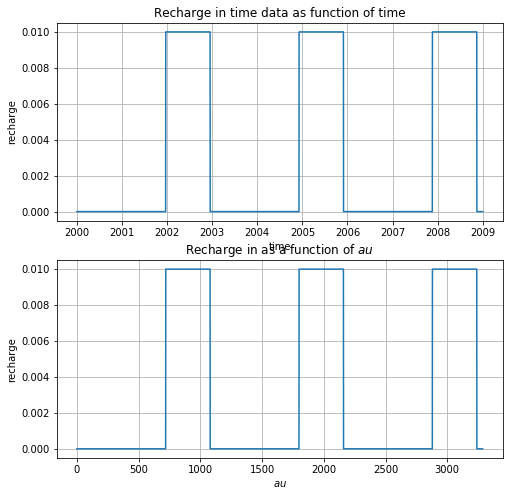

In [26]:
fig, ax = plt.subplots(2)
fig.set_size_inches(8, 8)
ax[0].set_title("Recharge in time data as function of time")
ax[0].set_xlabel('time')
ax[0].set_ylabel('recharge')
ax[0].grid()
ax[0].plot(time_data.index, time_data['N'])
ax[1].set_title("Recharge in as a function of $\tau$")
ax[1].set_xlabel('$\tau$')
ax[1].set_ylabel("recharge")
ax[1].grid()
ax[1].plot(taus, N)
plt.show()

Now simulate the head caused by these recharge blocks for three differently derived responses, which should all yield the same result, i.e. the step response due to a constant recharge of 0.01 m/d. The steady-steate result is also plotted for verification.

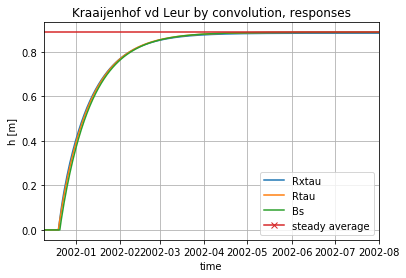

In [33]:
S, kD, b, x = 0.2, 600, 400, 0.58*b # with b = 0.56 x htau and hxtau should about match

fig, ax = plt.subplots()
ax.set_title("Kraaijenhof vd Leur by convolution, responses")
ax.set_xlabel('time')
ax.set_ylabel('h [m]')
ax.set_xlim((np.datetime64('2001-12-10'), np.datetime64('2002-08-01')))
#plt.xlim((times[0], times[180]))
ax.grid()

ax.plot(time_data.index, lfilter(Rxtau(kD, S, b, x, taus), 1, time_data['N']), label='Rxtau')
ax.plot(time_data.index, lfilter(Rtau(kD, S, b, taus), 1, time_data['N']), label='Rtau')
ax.plot(time_data.index, lfilter(Bs(kD, S, b, taus), 1, time_data['N']), label="Bs")
ax.plot(time_data.index[[0,-1]], time_data['N'].max() * 1/3 * b ** 2 / kD * np.ones(2), 'x-', label='steady average')
ax.legend()
plt.show()

Now do the same with the actual recharge

In [36]:
meteo = gg.get_meteo(meteofile)

# make sure the time data has time steps all equal to dt
dt    = 1 # d  set tau itnerval and time interval
taus  = np.array((meteo.index - meteo.index[0]) / np.timedelta64(dt, 'D')) # get the taus
times = np.datetime64(meteo.index[0]) + taus * np.timedelta64(1, 'D') # recompute the time stamps
N     = np.interp(np.arange(0, taus[-1] + 0.1, dt), taus, meteo['N']) # get the recharge by interpolation

time_data = pd.DataFrame(index=times)
time_data['N'] = N

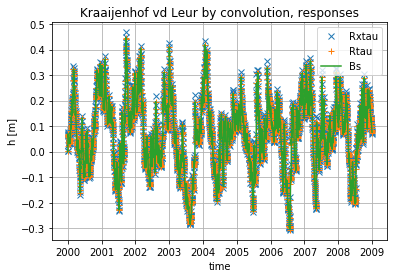

In [40]:
fig, ax = plt.subplots()
ax.set_title("Kraaijenhof vd Leur by convolution, responses")
ax.set_xlabel('time')
ax.set_ylabel('h [m]')
#plt.xlim((times[0], times[180]))
ax.grid()

ax.plot(time_data.index, lfilter(Rxtau(kD, S, b, x, taus), 1, time_data['N']), 'x', label='Rxtau')
ax.plot(time_data.index, lfilter(Rtau(kD, S, b, taus), 1, time_data['N']), '+', label='Rtau')
ax.plot(time_data.index, lfilter(Bs(kD, S, b, taus), 1, time_data['N']), label="Bs")
ax.legend()
plt.show()

This, clearly yields the same results foor all three methods of obtaining the response.

## Correcting the moment of the computed heads

De we have to do this? When the recharce falls at day i, the head will be affected at i+1. This is not conform the setup done in GGOR. The recharge on day i will have effect at the end of the same day, which also has the index i. This seems a bit tricky. This way some artifical trick may be necessary to deal with the data. What does a date mean. The head at its beginning or at its end?